In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


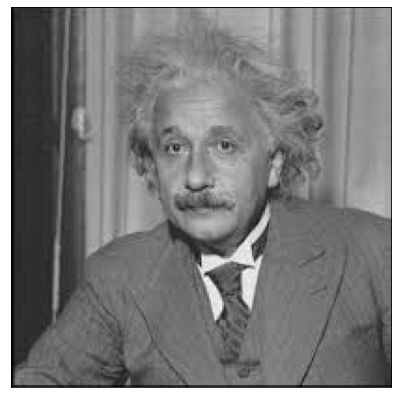

In [17]:
img = cv2.imread('image.jpg',0)
plt.figure(figsize=(7,7))
plt.imshow(img,'gray')
plt.xticks([])
plt.yticks([])
plt.show()

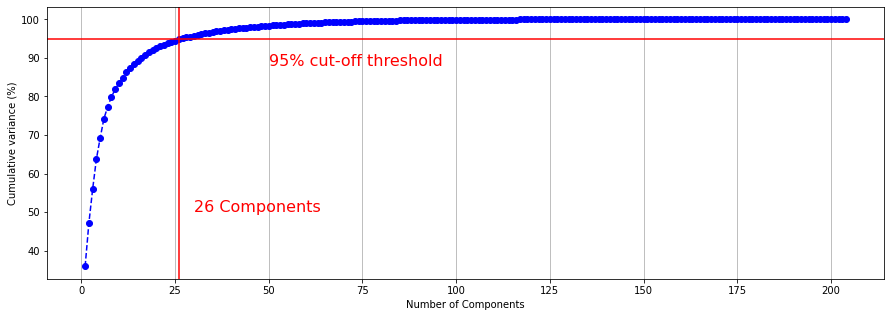

In [13]:
x_meaned = (img - np.mean(img , axis = 0))
cov_mat = np.cov(x_meaned.T)
eigen_values , eigen_vectors = np.linalg.eig(cov_mat)
sorted_index = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_index]
eigen_vectors = eigen_vectors[:,sorted_index]

explained_var_data_pca = (eigen_values / np.sum(eigen_values))

s = 0
sum = []
for i in range(len(eigen_values)):
  s = s + explained_var_data_pca[i]*100
  sum.append(s)

num_components_95= [x for x in range(len(sum)) if sum[x] > 95][0]

plt.figure(figsize=(15, 5))
plt.grid(axis='x')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.plot(range(1,len(eigen_values)+1),sum,marker='o', linestyle='--', color='b')
plt.axhline(y=95, color='r', linestyle='-')
plt.text(50, 88, '95% cut-off threshold', color = 'red', fontsize=16)
plt.axvline(x=num_components_95 , color='r', linestyle='-')
plt.text(30, 50, '{} Components'.format(num_components_95), color = 'red', fontsize=16)
plt.show()

eigen_vectors = eigen_vectors[:,0:num_components_95]

img_pca = np.dot(np.dot(img, eigen_vectors),eigen_vectors.T)


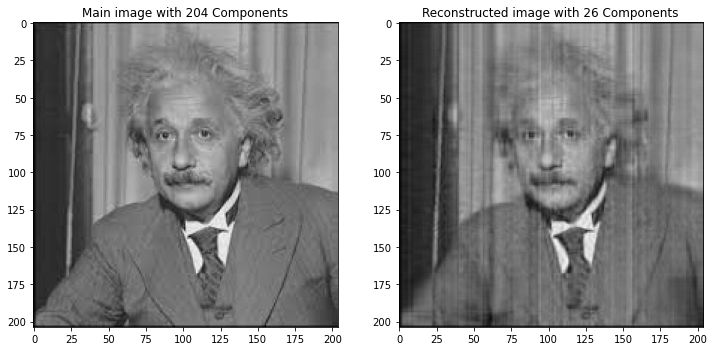

In [28]:
# data = np.reshape(img,img.shape)

img_pca = np.reshape(img_pca,img.shape)
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("Main image with 204 Components")
plt.imshow(img,'gray')
plt.subplot(1,2,2)
plt.imshow(img_pca,'gray')
plt.title("Reconstructed image with 26 Components")
plt.show()